



## Project Objective
In this final year project, the main objective is to automate the detection of defects in electronic chips manufactured by STMicroElectonics. To achieve this, we have developed, trained, and evaluated a Random Forest model for binary classification.

## Data

The database used for this learning process was obtained after several data preparation processes. It resulted from merging the input and output databases, taking into account the arrangement of the chips on each grid. These two databases were provided by STMicroelectronics. After all these processes, our study database contains 20 explanatory variables, all quantitative. Our target variable is qualitative in nature.


## Notebook Steps


   
1. **Exploratory Data Analysis (EDA) and Visualization:**
   - Understanding and Visualizing Chip Coordinates
   - Analyzing Defective Chips Over Time
   - Investigating Border-Related Chip Characteristics

2. **Statistical Analysis:**
   - Chi-Squared Test for Border vs. Output Relationship
   - Analysis of Variance (ANOVA) for Quantitative Variables
   - Correlation Matrix and Variable Distributions

3. **Feature Engineering and Preprocessing:**
   
   - Scaling Numerical Features for Model Input
   
4. **Data Resampling and Visualization:**
   - Impact of SMOTE and RandomUnderSampler on Data Distribution
   - Scatter Plot After Resampling Techniques

5. **Machine Learning Model Development:**
   - RandomForestClassifier with Hyperparameter Tuning
   - Handling Imbalanced Data with SMOTE and RandomUnderSampler

6. **Model Evaluation:**
   - Accuracy, Precision, Recall, and F1-Score
   - Confusion Matrix and Classification Report

7. **Threshold Optimization and Analysis:**
   - Evolution of Metrics with Probability Threshold
   - Filtering Predictions based on Probability Threshold

8. **Feature Importance and Model Interpretation:**
   - Visualizing Top Features with RandomForest
   - Profiling true positives and false positives








### **Library Importation:**

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


# Statistical Analysis
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    f1_score, precision_score, recall_score
)

# Model Training and Evaluation
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV
)

# Imbalanced Data Handling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC, RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler





### **Data Loading:**

In [41]:
# Read data from an Excel file named "data_final_A.xlsx" into a DataFrame
stm_puce_df = pd.read_excel("data_final_A.xlsx")

# Display the first few rows of the DataFrame
stm_puce_df.head()


BATCH_ID  OUTPUT_MAPPING_X  OUTPUT_MAPPING_Y    PHASE  \
0  27900923591388000                13                 3  PHASE_A   
1  27900923591388000                13                 0  PHASE_A   
2  27900923591388000                12                 2  PHASE_A   
3  27900923591388000                11                 0  PHASE_A   
4  27900923591388000                 6                 0  PHASE_A   

   INPUT_MAPPING_X  INPUT_MAPPING_Y              date_input  avg_param_1  \
0                3                1 2023-07-18 10:06:12.866   987.808750   
1                3                4 2023-07-18 10:07:08.066   970.526339   
2                4                2 2023-07-18 10:07:49.616   968.988929   
3                5                4 2023-07-18 10:09:44.966   977.010982   
4               10                4 2023-07-18 10:16:18.283   976.364911   

   q1_param_1  q2_param_1  ...  q3_param_3  stddev_param_3   avg_param_4  \
0    970.4725     989.735  ...   2975.5400       14.404995 -22637.165179   
1    955.2300     967.960  ...   2982.0875       15.243108 -12590.649821   
2    951.0425     970.640  ...   2981.3600       16.797304 -17512.085000   
3    960.5900     978.680  ...   2984.2700       15.586080 -12237.197500   
4    961.0925     974.660  ...   2978.4500       16.249023 -11797.630714   

   q1_param_4  q2_param_4  q3_param_4  stddev_param_4               TIMESTAMP  \
0  -23310.545   -22610.44   -22039.27      729.205467 2023-07-19 07:04:41.413   
1  -13304.225   -12678.83   -11835.33      828.633219 2023-07-19 07:04:41.413   
2  -18607.430   -17771.16   -16255.27     1129.364605 2023-07-19 07:04:41.413   
3  -13387.370   -12225.75   -11037.62     1464.862579 2023-07-19 07:04:41.413   
4  -11967.880   -11837.74   -11661.81      229.372271 2023-07-19 07:04:41.413   

   CATEGORY  OUTPUT  
0      1674       0  
1      1674       0  
2      1674       0  
3      1674       0  
4      1674       0  

[5 rows x 30 columns]

In [42]:
stm_puce_df.drop(columns = ['PHASE', 'CATEGORY'], inplace= True)
stm_puce_df = stm_puce_df.rename(columns={"TIMESTAMP": "date_output"})

## 1. **Exploratory Data Analysis (EDA) and Visualization:**

In [43]:
stm_puce_df.shape

(55207, 28)

In [45]:
stm_puce_df.head()

BATCH_ID  OUTPUT_MAPPING_X  OUTPUT_MAPPING_Y  INPUT_MAPPING_X  \
0  27900923591388000                13                 3                3   
1  27900923591388000                13                 0                3   
2  27900923591388000                12                 2                4   
3  27900923591388000                11                 0                5   
4  27900923591388000                 6                 0               10   

   INPUT_MAPPING_Y              date_input  avg_param_1  q1_param_1  \
0                1 2023-07-18 10:06:12.866   987.808750    970.4725   
1                4 2023-07-18 10:07:08.066   970.526339    955.2300   
2                2 2023-07-18 10:07:49.616   968.988929    951.0425   
3                4 2023-07-18 10:09:44.966   977.010982    960.5900   
4                4 2023-07-18 10:16:18.283   976.364911    961.0925   

   q2_param_1  q3_param_1  ...  q2_param_3  q3_param_3  stddev_param_3  \
0     989.735   1001.4600  ...     2966.81   2975.5400       14.404995   
1     967.960    984.2075  ...     2975.54   2982.0875       15.243108   
2     970.640    985.3800  ...     2969.72   2981.3600       16.797304   
3     978.680    991.5775  ...     2972.63   2984.2700       15.586080   
4     974.660    989.7350  ...     2969.72   2978.4500       16.249023   

    avg_param_4  q1_param_4  q2_param_4  q3_param_4  stddev_param_4  \
0 -22637.165179  -23310.545   -22610.44   -22039.27      729.205467   
1 -12590.649821  -13304.225   -12678.83   -11835.33      828.633219   
2 -17512.085000  -18607.430   -17771.16   -16255.27     1129.364605   
3 -12237.197500  -13387.370   -12225.75   -11037.62     1464.862579   
4 -11797.630714  -11967.880   -11837.74   -11661.81      229.372271   

              date_output  OUTPUT  
0 2023-07-19 07:04:41.413       0  
1 2023-07-19 07:04:41.413       0  
2 2023-07-19 07:04:41.413       0  
3 2023-07-19 07:04:41.413       0  
4 2023-07-19 07:04:41.413       0  

[5 rows x 28 columns]

In [47]:
stm_puce_df.columns

Index(['BATCH_ID', 'OUTPUT_MAPPING_X', 'OUTPUT_MAPPING_Y', 'INPUT_MAPPING_X',
       'INPUT_MAPPING_Y', 'date_input', 'avg_param_1', 'q1_param_1',
       'q2_param_1', 'q3_param_1', 'stddev_param_1', 'avg_param_2',
       'q1_param_2', 'q2_param_2', 'q3_param_2', 'stddev_param_2',
       'avg_param_3', 'q1_param_3', 'q2_param_3', 'q3_param_3',
       'stddev_param_3', 'avg_param_4', 'q1_param_4', 'q2_param_4',
       'q3_param_4', 'stddev_param_4', 'date_output', 'OUTPUT'],
      dtype='object')

In [46]:
stm_puce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55207 entries, 0 to 55206
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BATCH_ID          55207 non-null  int64         
 1   OUTPUT_MAPPING_X  55207 non-null  int64         
 2   OUTPUT_MAPPING_Y  55207 non-null  int64         
 3   INPUT_MAPPING_X   55207 non-null  int64         
 4   INPUT_MAPPING_Y   55207 non-null  int64         
 5   date_input        55207 non-null  datetime64[ns]
 6   avg_param_1       55207 non-null  float64       
 7   q1_param_1        55207 non-null  float64       
 8   q2_param_1        55207 non-null  float64       
 9   q3_param_1        55207 non-null  float64       
 10  stddev_param_1    55207 non-null  float64       
 11  avg_param_2       55207 non-null  float64       
 12  q1_param_2        55207 non-null  float64       
 13  q2_param_2        55207 non-null  float64       
 14  q3_param_2        5520

In [5]:
stm_puce_df.describe(include = float)

avg_param_1    q1_param_1    q2_param_1    q3_param_1  stddev_param_1  \
count  55207.000000  55207.000000  55207.000000  55207.000000    55207.000000   
mean     975.819270    960.044599    975.741524    991.444418       23.429818   
std       27.265532     27.532977     27.170396     26.948010        2.867893   
min      909.951161    892.752500    908.330000    923.907500       15.534026   
25%      957.616875    941.662500    957.575000    973.487500       21.667795   
50%      974.492500    959.082500    974.660000    990.237500       23.071238   
75%      992.720089    977.340000    992.750000   1008.160000       24.658589   
max     1078.958661   1061.760000   1079.180000   1093.417500      108.874814   

        avg_param_2    q1_param_2    q2_param_2    q3_param_2  stddev_param_2  \
count  55207.000000  55207.000000  55207.000000  55207.000000    55207.000000   
mean    5853.406376   5756.984647   5850.187116   5943.810744      146.999792   
std      156.980992    154.510830    154.297237    154.987441       34.766311   
min     5458.571429   5358.527500   5445.250000   5535.702500       93.913829   
25%     5750.077589   5656.927500   5749.245000   5840.630000      128.095600   
50%     5848.289821   5751.110000   5846.225000   5938.542500      137.396555   
75%     5944.487187   5848.090000   5941.340000   6035.522500      151.350357   
max     6683.264630   6376.817500   6743.290000   7123.750000      729.839938   

        avg_param_3    q1_param_3    q2_param_3    q3_param_3  stddev_param_3  \
count  55207.000000  55207.000000  55207.000000  55207.000000    55207.000000   
mean    2974.465569   2963.584711   2974.484521   2985.357290       16.291479   
std        7.266164      7.732177      7.395390      7.369095        2.254111   
min     2946.128214   2934.800000   2943.530000   2955.170000        7.883774   
25%     2969.720000   2958.080000   2969.720000   2981.360000       15.019547   
50%     2974.136964   2963.900000   2974.085000   2984.270000       16.361482   
75%     2978.683839   2968.992500   2978.450000   2990.090000       17.743991   
max     3011.707143   2998.820000   3013.370000   3025.010000       29.947504   

        avg_param_4    q1_param_4    q2_param_4    q3_param_4  stddev_param_4  
count  55207.000000  55207.000000  55207.000000  55207.000000    55207.000000  
mean   -5616.287333  -6782.410072  -5653.404762  -4449.228991     1273.312285  
std    17855.045214  17771.347917  17837.518615  17976.642883      692.124786  
min   -33560.963571 -34517.045000 -33706.080000 -32821.610000      162.543424  
25%   -17980.055357 -19275.000000 -18004.930000 -16781.855000      720.205175  
50%   -11602.420714 -12659.550000 -11620.840000 -10483.320000     1132.006404  
75%     4708.911161   3747.127500   4694.860000   5544.385000     1744.786932  
max    44811.461786  42933.125000  44308.030000  48101.370000     4621.854154

In [7]:
import plotly.graph_objects as go

labels = stm_puce_df.OUTPUT.value_counts().index.tolist()

# Choisir une palette de couleurs (remplacez-la par celle de votre choix)
# Define color map based on purple color
cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]


# Obtenir les comptages pour chaque catégorie
value_counts = stm_puce_df['OUTPUT'].value_counts()

values = value_counts.values.tolist()

# Créer le pie chart
pie_chart = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=0.6,
    marker=dict(colors=color_list, line=dict(color='white', width=3)),
    textposition='inside',
    textinfo='percent+label',
)])

# Mettre à jour la mise en page
pie_chart.update_layout(
    title=f'Distribution of OUTPUT',
    showlegend=False,
    height=400,
    width=500,
)

# Afficher le pie chart
pie_chart.show()


In [8]:
# Creating a grid with specific x and y limits
def plot_custom_grid(x_limit, y_limit):
    # Drawing horizontal lines
    for y in range(0, y_limit + 1):
        plt.plot([0, x_limit], [y, y], color='black', linestyle='-', linewidth=1)

    # Drawing vertical lines
    for x in range(0, x_limit + 1):
        plt.plot([x, x], [0, y_limit], color='black', linestyle='-', linewidth=1)


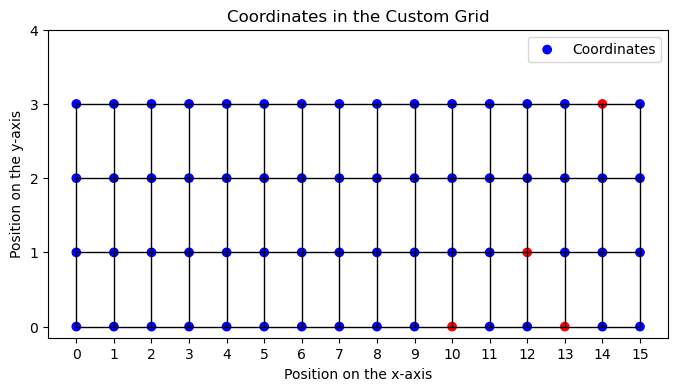

In [9]:
stm_puce_df_filtered = stm_puce_df[stm_puce_df['BATCH_ID'] == 27900927041688000]

# Creating the plot with a custom grid
plt.figure(figsize=(8, 4))
plot_custom_grid(15, 3)

scatter = plt.scatter(stm_puce_df_filtered['OUTPUT_MAPPING_X'], stm_puce_df_filtered['OUTPUT_MAPPING_Y'], c=np.where(stm_puce_df_filtered['OUTPUT'] == 0, 'blue', 'red'), marker='o', label='Coordinates')

plt.yticks(np.arange(0, 4.1, 1))

plt.xticks(np.arange(0, 16, 1))

# Adding labels, title and legend
plt.xlabel('Position on the x-axis')
plt.ylabel('Position on the y-axis')
plt.title('Coordinates in the Custom Grid')
plt.legend()

# Displaying the plot
plt.grid(False)  # Disable matplotlib grid to avoid overlap
plt.show()


In [10]:
# Renaming the column "TIMESTAMP" to "date_output"


# Creating a new column "day_input" and "day_output" 
stm_puce_df['day_input'] = pd.to_datetime(stm_puce_df['date_input'], utc=True).dt.strftime("%Y-%m-%d")
stm_puce_df['day_output'] = pd.to_datetime(stm_puce_df['date_output'], utc=True).dt.strftime("%Y-%m-%d")


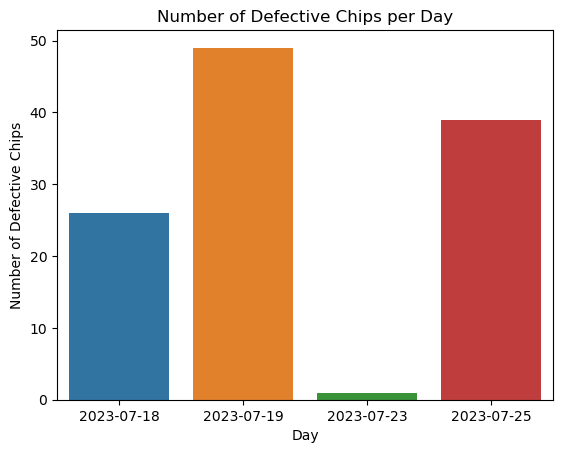

In [11]:
# Grouping by day and counting the number of values equal to 1 in 'OUTPUT'
defect_count = stm_puce_df[stm_puce_df['OUTPUT'] == 1].groupby('day_output').size().reset_index(name='Count')

sns.barplot(data=defect_count, x='day_output', y='Count')

# Adding title and labels
plt.title('Number of Defective Chips per Day')
plt.ylabel('Number of Defective Chips')
plt.xlabel('Day')
plt.show()


## 2. **Statistical Analysis:**

In [12]:


# Define the logical condition for the border
condition = ((stm_puce_df['OUTPUT_MAPPING_X'] == 0) | 
             (stm_puce_df['OUTPUT_MAPPING_X'] == 15) | 
             (stm_puce_df['OUTPUT_MAPPING_Y'] == 0) | 
             (stm_puce_df['OUTPUT_MAPPING_Y'] == 3))

# Create the 'border' column based on the condition
stm_puce_df['border'] = condition.astype(int)



In [13]:
# Creating a contingency table using crosstab
contingency_table = pd.crosstab(index=stm_puce_df['border'], columns=stm_puce_df['OUTPUT'])
contingency_table


OUTPUT      0   1
border           
0       24162  24
1       30930  91

In [14]:



# Performing the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing the results of the chi-squared test
print("\nChi-squared Test for 'border' with respect to 'OUTPUT':")
print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_value}")



Chi-squared Test for 'border' with respect to 'OUTPUT':
Chi2 Statistic: 23.71057334832996, p-value: 1.119657100197737e-06


In [15]:
# Selecting the necessary columns
stm_puce_df = stm_puce_df[['OUTPUT', 'border', 'avg_param_1', 'q1_param_1', 'q2_param_1', 'q3_param_1', 'stddev_param_1',
                             'avg_param_2', 'q1_param_2', 'q2_param_2', 'q3_param_2', 'stddev_param_2',
                             'avg_param_3', 'q1_param_3', 'q2_param_3', 'q3_param_3', 'stddev_param_3',
                             'avg_param_4', 'q1_param_4', 'q2_param_4', 'q3_param_4', 'stddev_param_4']]

# Displaying the first few rows of the DataFrame
stm_puce_df.head()


OUTPUT  border  avg_param_1  q1_param_1  q2_param_1  q3_param_1  \
0       0       1   987.808750    970.4725     989.735   1001.4600   
1       0       1   970.526339    955.2300     967.960    984.2075   
2       0       0   968.988929    951.0425     970.640    985.3800   
3       0       1   977.010982    960.5900     978.680    991.5775   
4       0       1   976.364911    961.0925     974.660    989.7350   

   stddev_param_1  avg_param_2  q1_param_2  q2_param_2  ...  avg_param_3  \
0       23.380850  6072.755893   5987.9650    6083.080  ...  2966.030536   
1       23.109753  5946.635268   5831.3050    5935.745  ...  2973.929107   
2       24.576420  5871.302589   5780.9500    5876.065  ...  2969.278304   
3       21.933610  5963.720000   5847.1575    5946.935  ...  2973.227589   
4       21.788927  5979.805625   5895.6475    5973.045  ...  2968.550804   

   q1_param_3  q2_param_3  q3_param_3  stddev_param_3   avg_param_4  \
0     2955.17     2966.81   2975.5400       14.404995 -22637.165179   
1     2963.90     2975.54   2982.0875       15.243108 -12590.649821   
2     2958.08     2969.72   2981.3600       16.797304 -17512.085000   
3     2963.90     2972.63   2984.2700       15.586080 -12237.197500   
4     2955.17     2969.72   2978.4500       16.249023 -11797.630714   

   q1_param_4  q2_param_4  q3_param_4  stddev_param_4  
0  -23310.545   -22610.44   -22039.27      729.205467  
1  -13304.225   -12678.83   -11835.33      828.633219  
2  -18607.430   -17771.16   -16255.27     1129.364605  
3  -13387.370   -12225.75   -11037.62     1464.862579  
4  -11967.880   -11837.74   -11661.81      229.372271  

[5 rows x 22 columns]

In [16]:
# List of names of quantitative variables
quantitative_variables = ['avg_param_1', 'q1_param_1', 'q2_param_1', 'q3_param_1', 'stddev_param_1',
                          'avg_param_2', 'q1_param_2', 'q2_param_2', 'q3_param_2', 'stddev_param_2',
                          'avg_param_3', 'q1_param_3', 'q2_param_3', 'q3_param_3', 'stddev_param_3',
                          'avg_param_4', 'q1_param_4', 'q2_param_4', 'q3_param_4', 'stddev_param_4']

# Performing ANOVA for each quantitative variable with respect to 'OUTPUT'
for q_var in quantitative_variables:
    
    print(f"\nANOVA for {q_var} with respect to OUTPUT:")

    unique_categories = stm_puce_df['OUTPUT'].unique()
  
    category_groups = [stm_puce_df[q_var][stm_puce_df['OUTPUT'] == category] for category in unique_categories]

    f_statistic, p_value = f_oneway(*category_groups)

    print(f"F-statistic: {f_statistic}, p-value: {p_value}")



ANOVA for avg_param_1 with respect to OUTPUT:
F-statistic: 33.03419979001415, p-value: 9.102725351315043e-09

ANOVA for q1_param_1 with respect to OUTPUT:
F-statistic: 28.93959378164888, p-value: 7.497390244460417e-08

ANOVA for q2_param_1 with respect to OUTPUT:
F-statistic: 29.925162157794453, p-value: 4.509920919636946e-08

ANOVA for q3_param_1 with respect to OUTPUT:
F-statistic: 32.03017312303131, p-value: 1.5254675018786104e-08

ANOVA for stddev_param_1 with respect to OUTPUT:
F-statistic: 797.3157130115133, p-value: 3.6070730652702466e-174

ANOVA for avg_param_2 with respect to OUTPUT:
F-statistic: 46.74771951104125, p-value: 8.157558471805143e-12

ANOVA for q1_param_2 with respect to OUTPUT:
F-statistic: 37.90373137324491, p-value: 7.483326368293148e-10

ANOVA for q2_param_2 with respect to OUTPUT:
F-statistic: 39.22204341311434, p-value: 3.8102252867839037e-10

ANOVA for q3_param_2 with respect to OUTPUT:
F-statistic: 39.761078979151584, p-value: 2.891720941442099e-10

ANOVA 

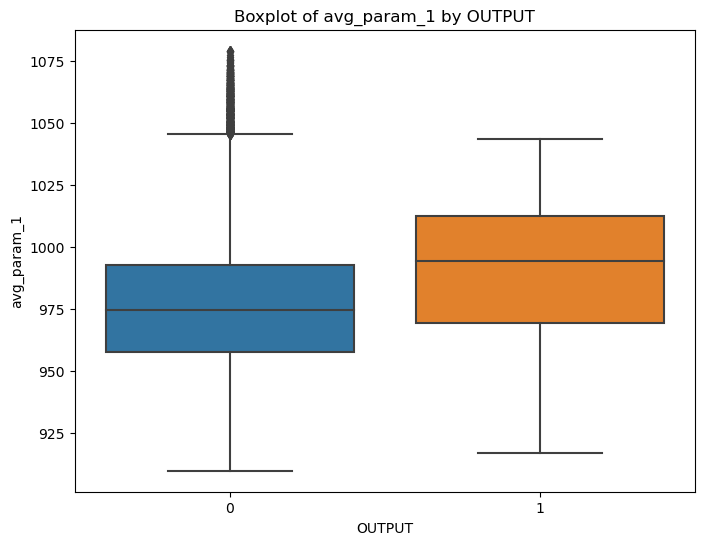

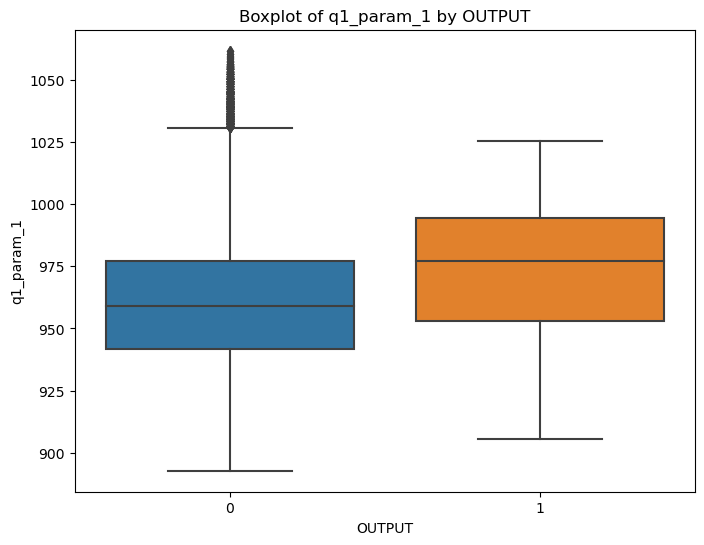

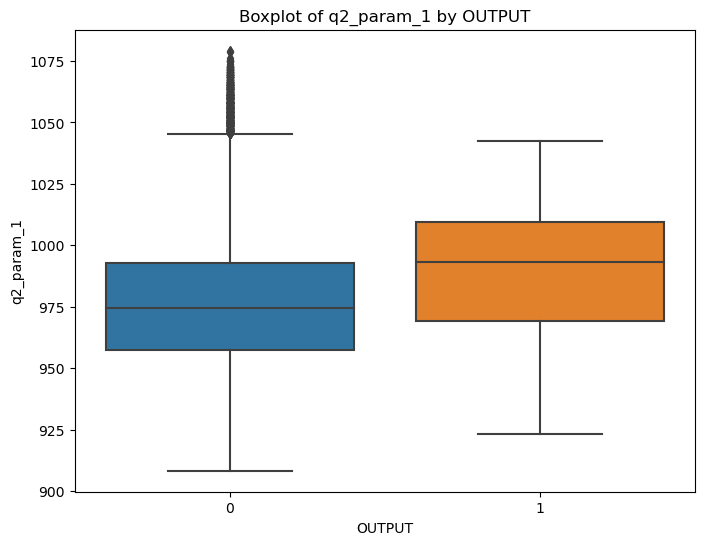

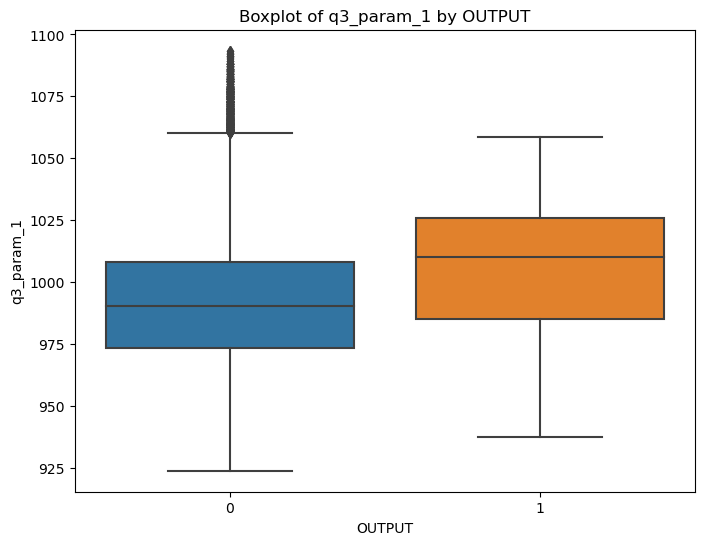

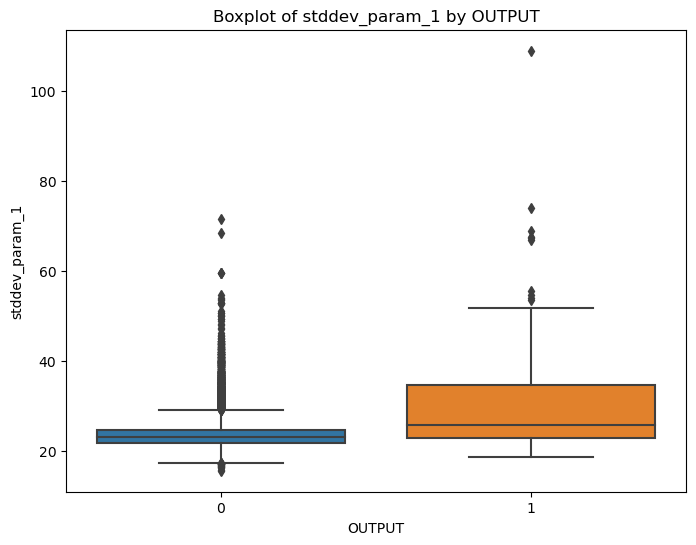

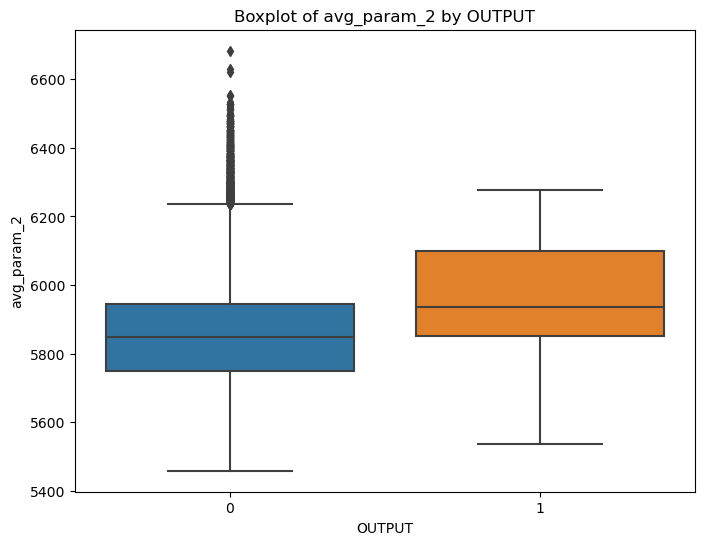

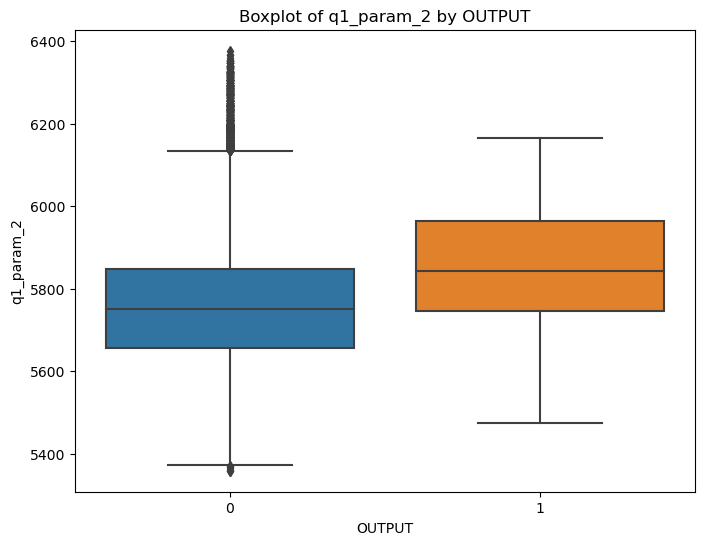

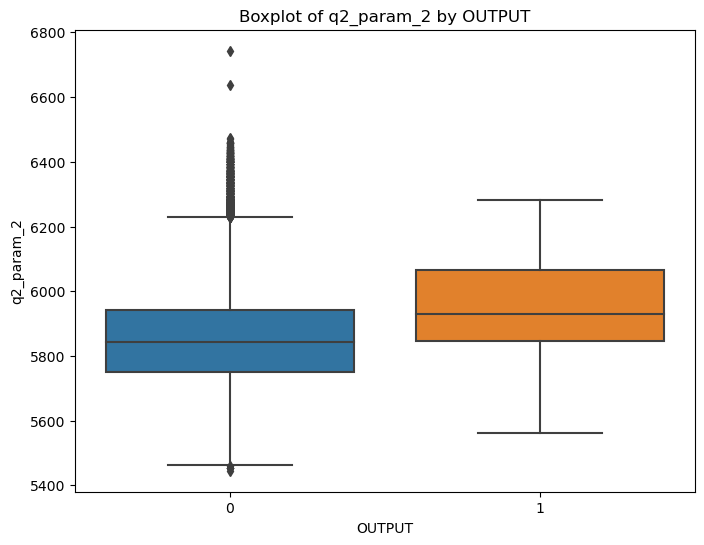

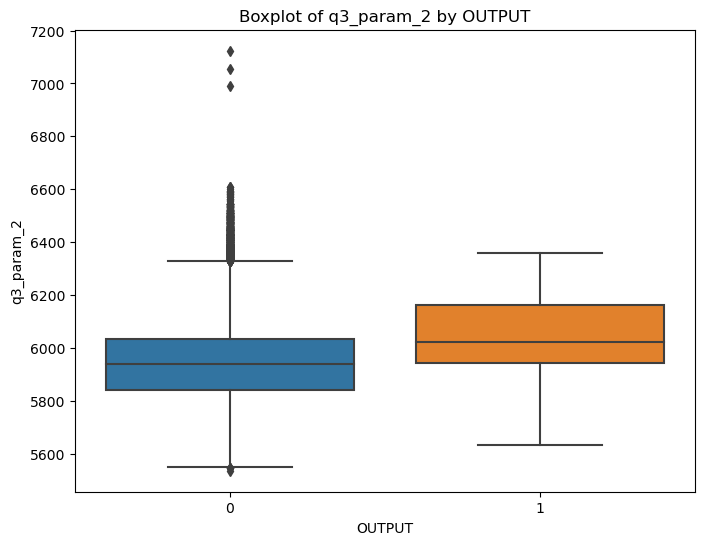

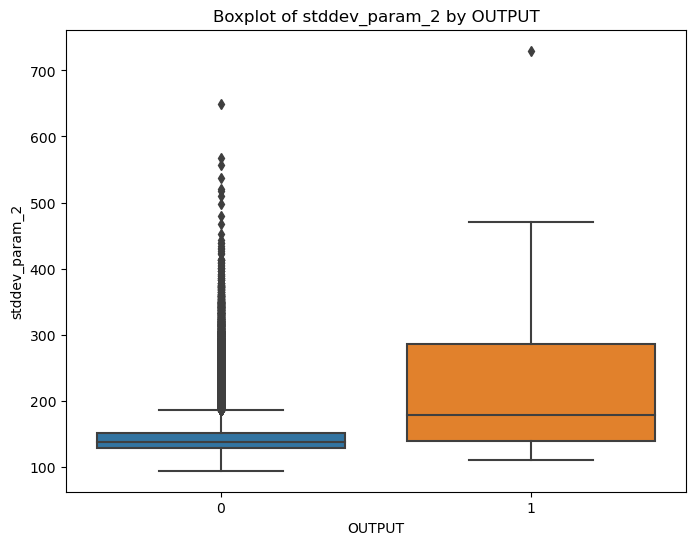

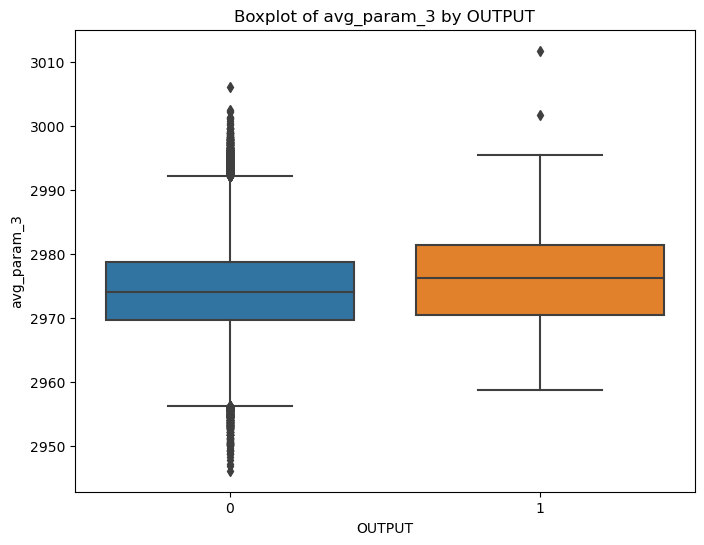

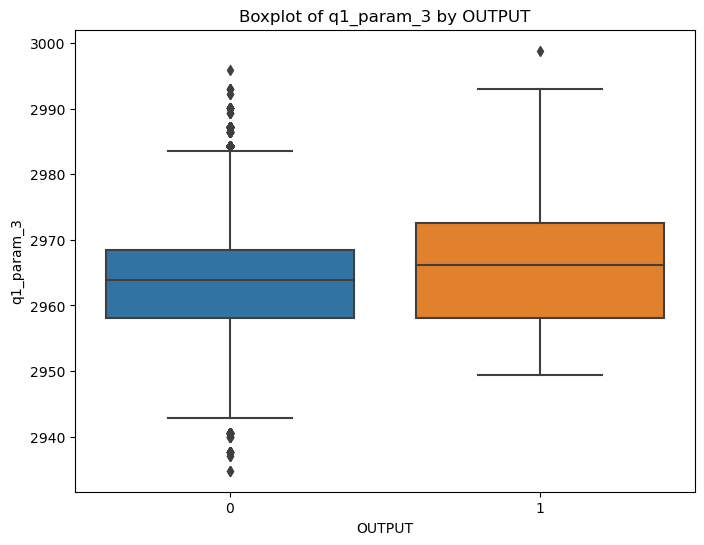

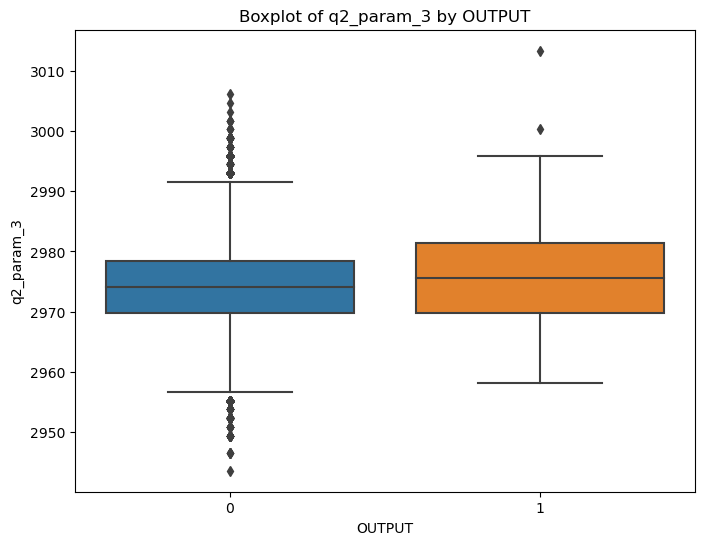

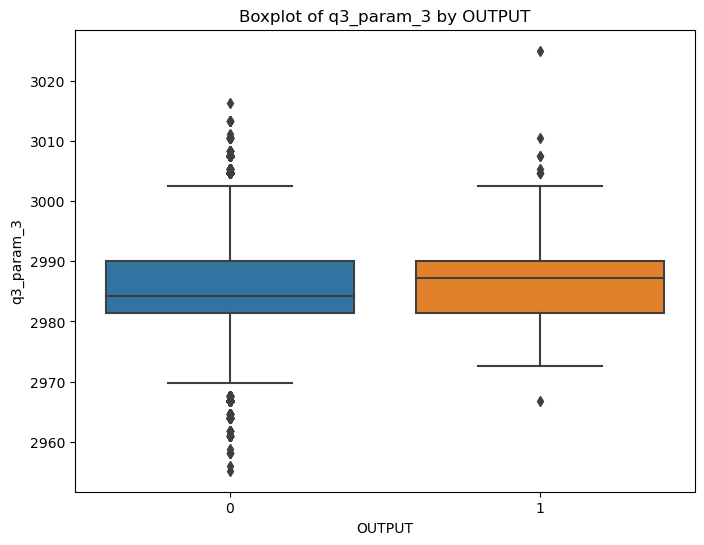

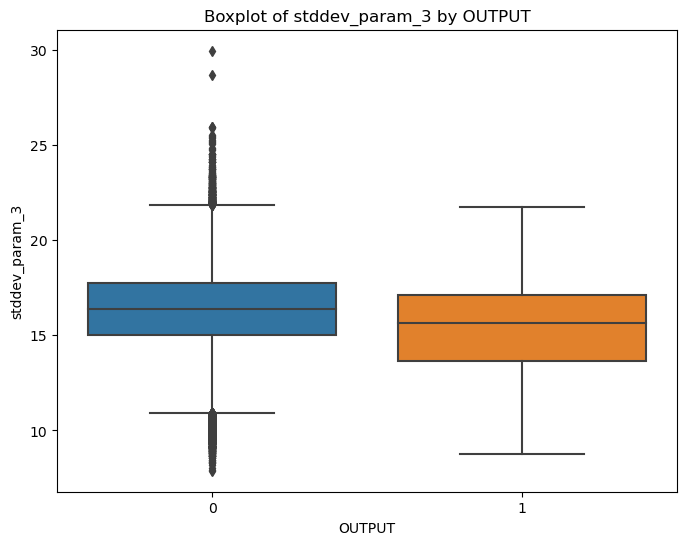

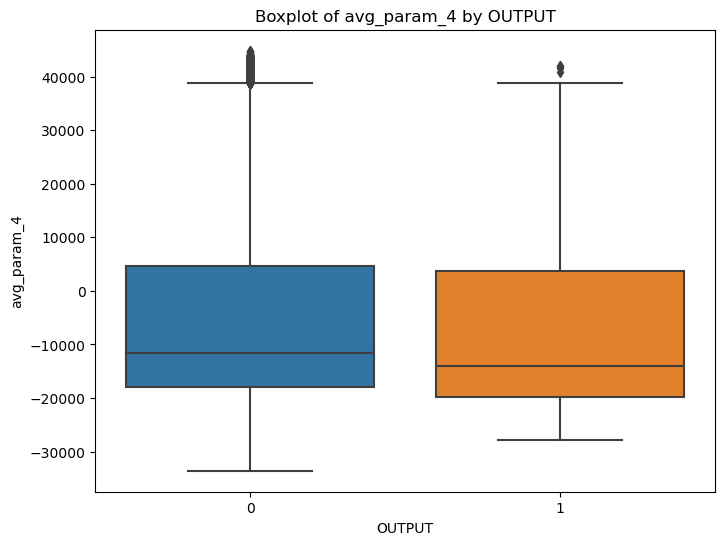

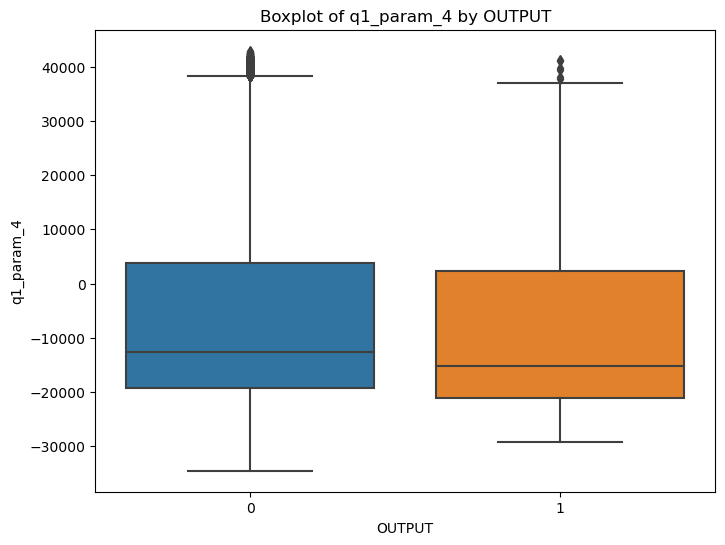

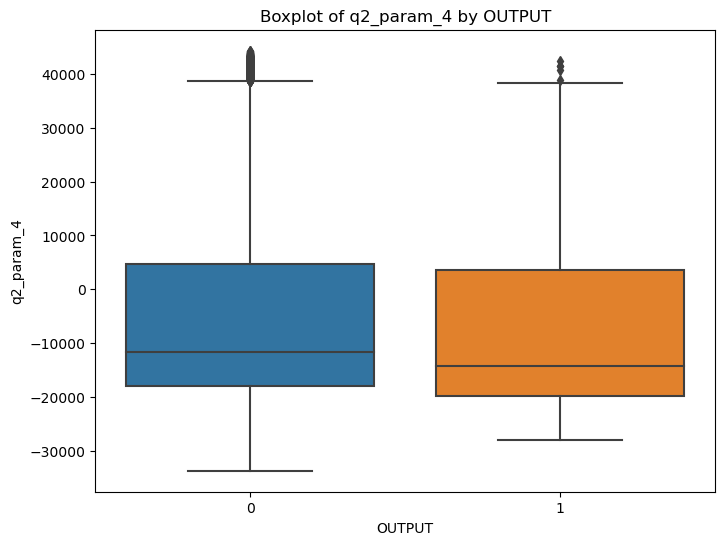

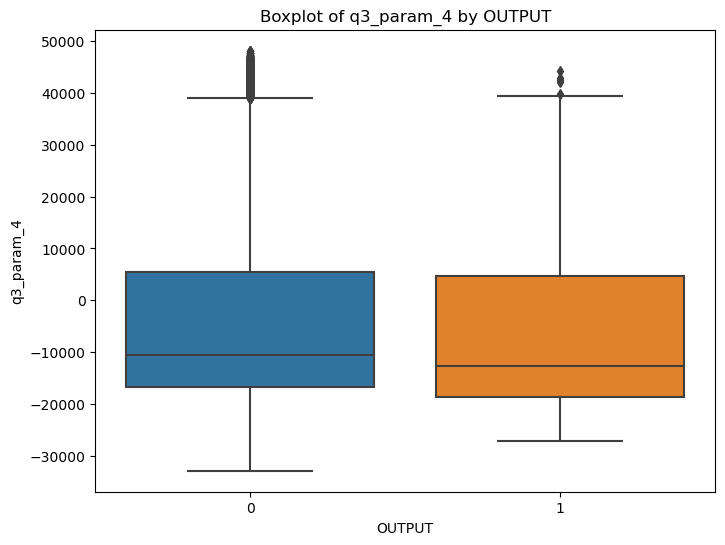

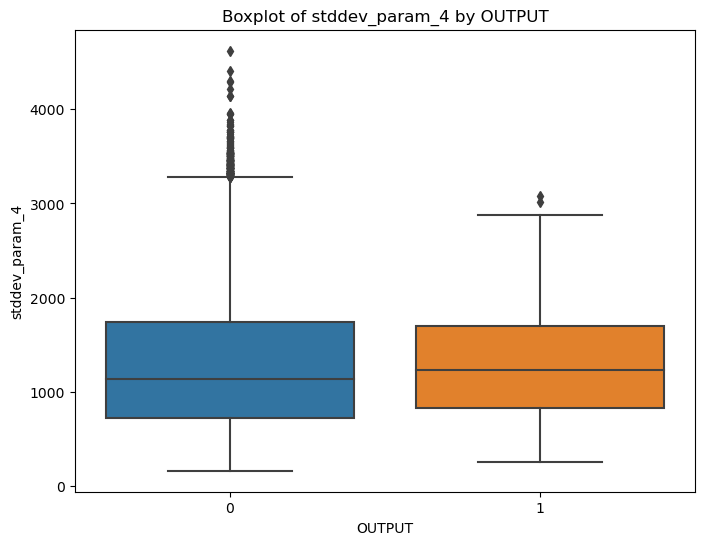

In [17]:
for q_var in quantitative_variables:

    plt.figure(figsize=(8, 6))
    sns.boxplot(x="OUTPUT", y=q_var, data=stm_puce_df)  # ci=None to disable confidence intervals

    # Add labels and a title
    plt.xlabel('OUTPUT')
    plt.ylabel(q_var)
    plt.title(f'Boxplot of {q_var} by OUTPUT')
    plt.show()


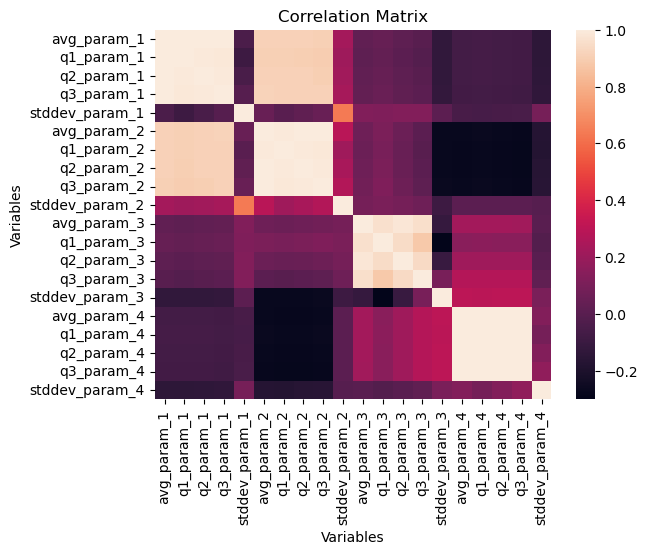

In [18]:
# Selecting numeric columns and calculating correlation
numeric_df = stm_puce_df[quantitative_variables]
corr = numeric_df.corr()

# Displaying the correlation matrix as a heatmap
sns.heatmap(corr)
plt.title("Correlation Matrix")
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


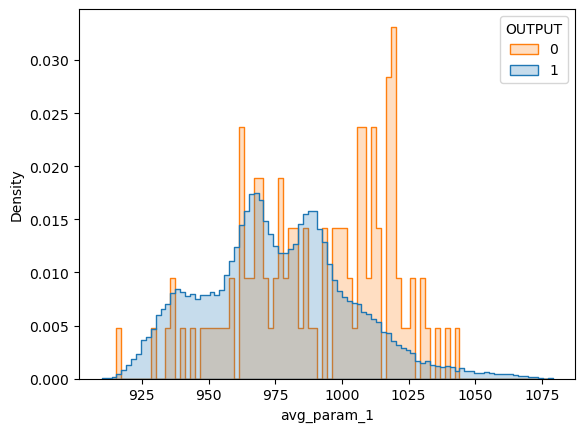

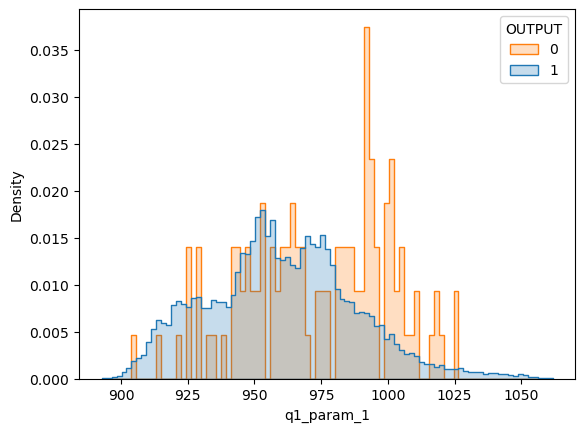

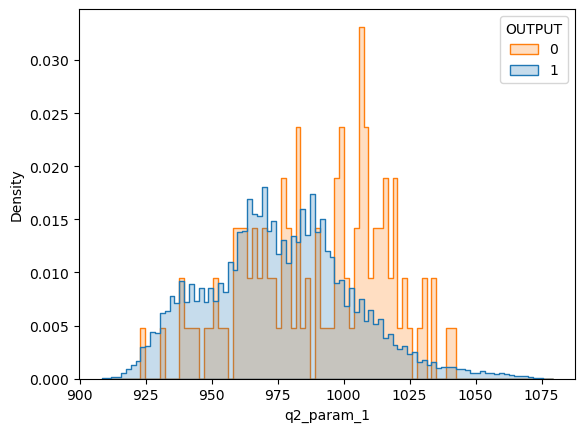

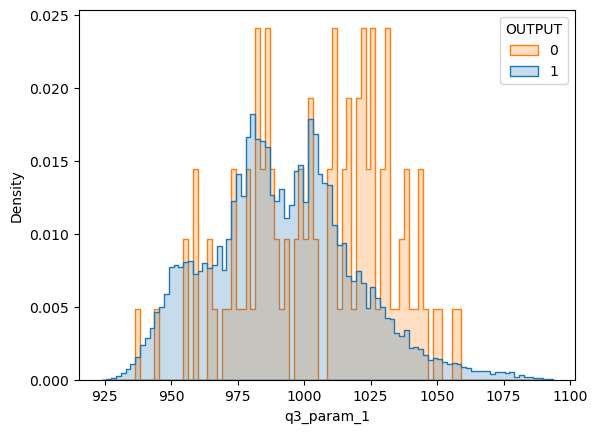

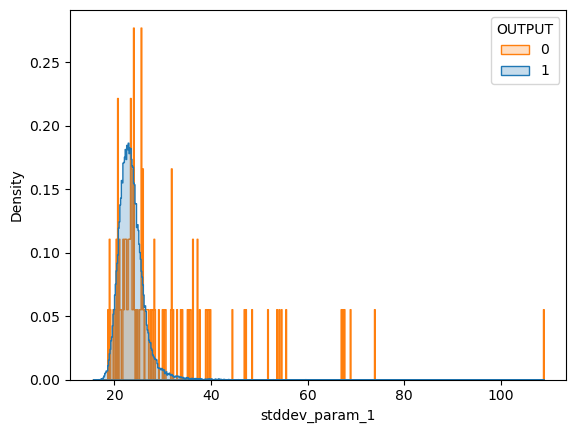

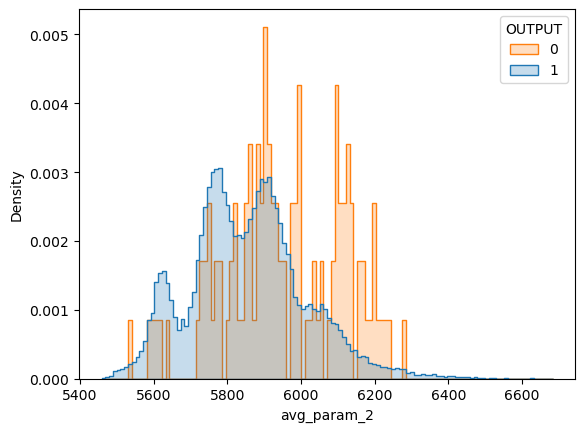

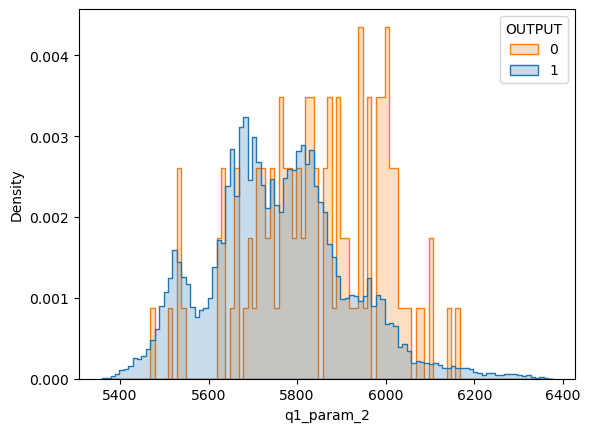

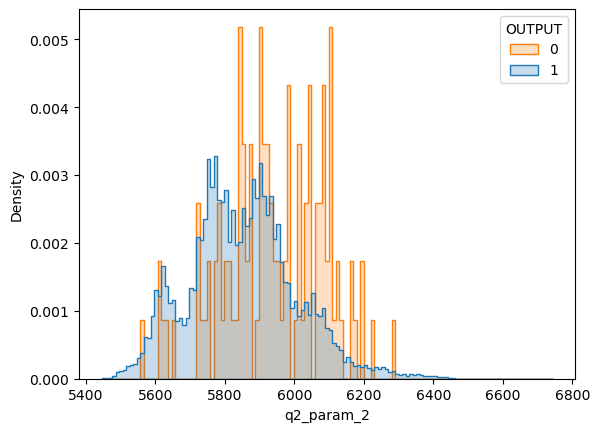

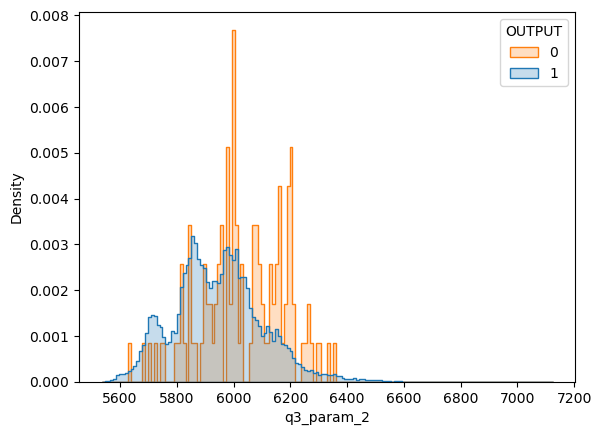

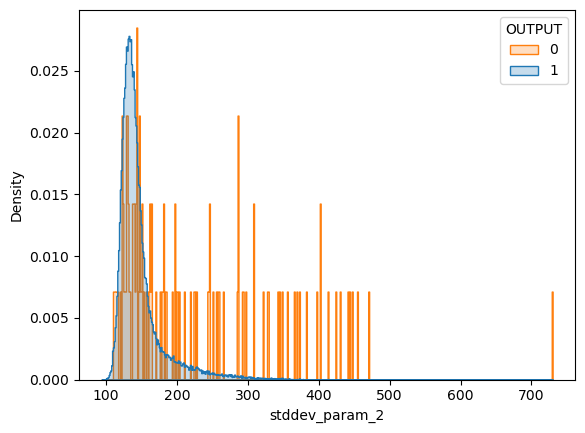

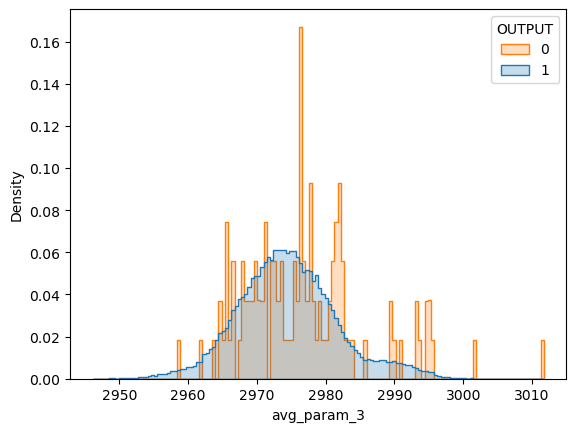

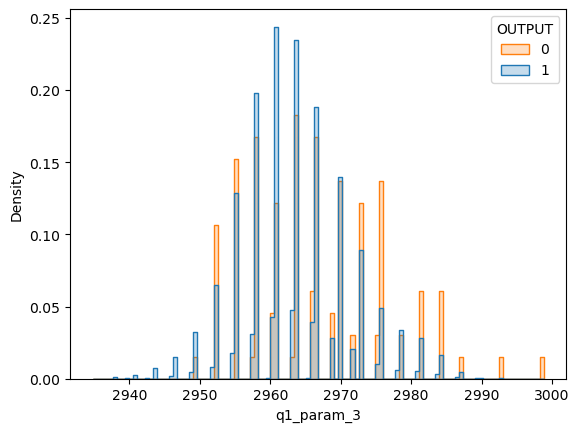

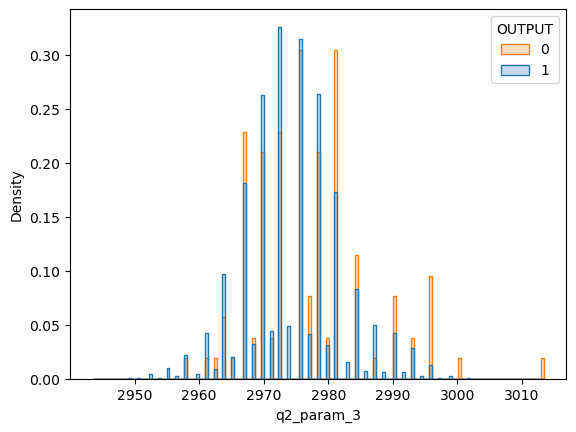

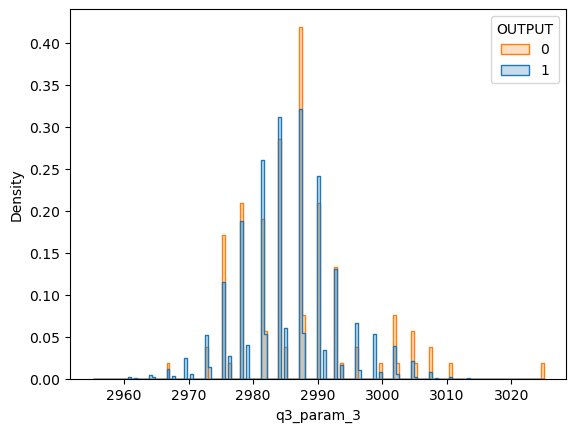

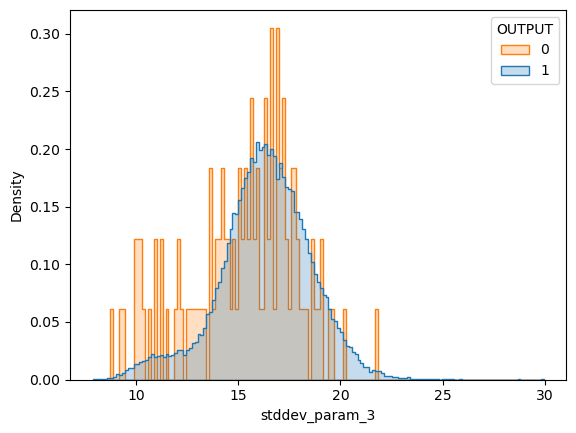

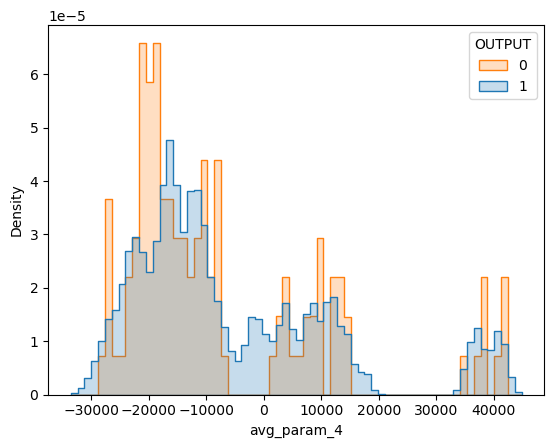

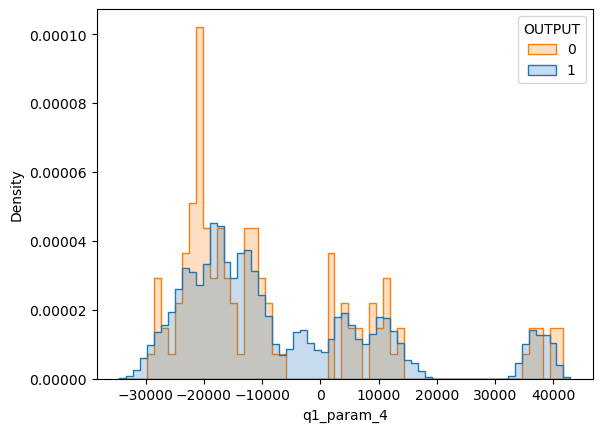

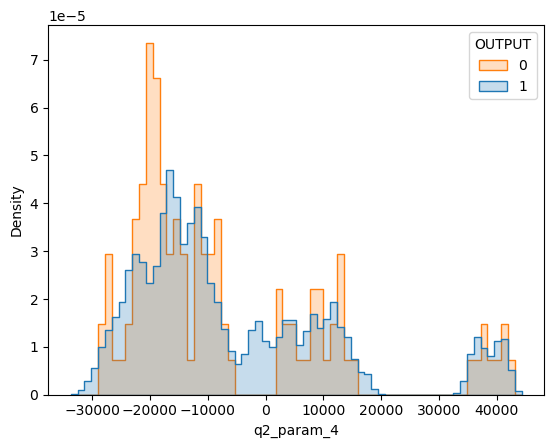

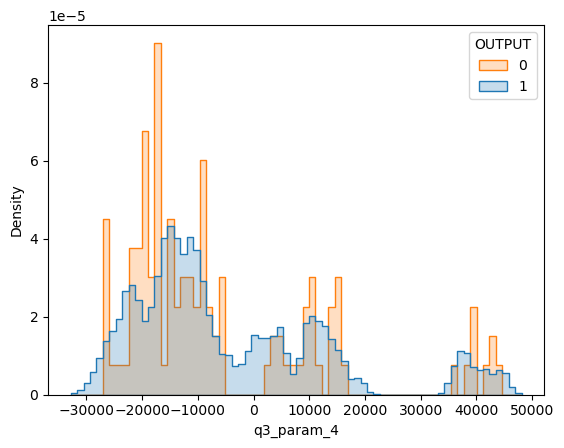

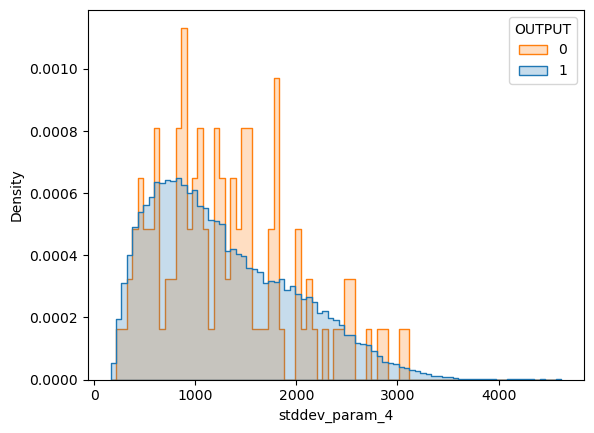

In [19]:
for q_var in quantitative_variables:
    
    # Create a density histogram with seaborn
    sns.histplot(stm_puce_df, x=q_var, hue='OUTPUT', element='step', stat='density', common_norm=False)

    # Add a legend
    plt.legend(title='OUTPUT', labels=['0', '1'])

    # Display the plot
    plt.show()


## 3. **Feature Engineering and Preprocessing:**

In [20]:
# Creating feature matrix X and target variable y
X = stm_puce_df.drop(columns=['OUTPUT', 'border'])
y = stm_puce_df['OUTPUT']

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)


In [21]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to be scaled
columns = ['avg_param_1', 'q1_param_1', 'q2_param_1', 'q3_param_1',
       'stddev_param_1', 'avg_param_2', 'q1_param_2', 'q2_param_2',
       'q3_param_2', 'stddev_param_2', 'avg_param_3', 'q1_param_3',
       'q2_param_3', 'q3_param_3', 'stddev_param_3', 'avg_param_4',
       'q1_param_4', 'q2_param_4', 'q3_param_4', 'stddev_param_4']

# Fit and transform the training set
X_train[columns] = scaler.fit_transform(X_train[columns])

# Apply the same transformation to the test set (do not use fit_transform here)
X_test[columns] = scaler.transform(X_test[columns])


## 4. **Data Resampling and Visualization:**

In [22]:
# Create a DataFrame with the training data
train_data = pd.DataFrame(data=X_train, columns=quantitative_variables)
train_data['OUTPUT'] = y_train


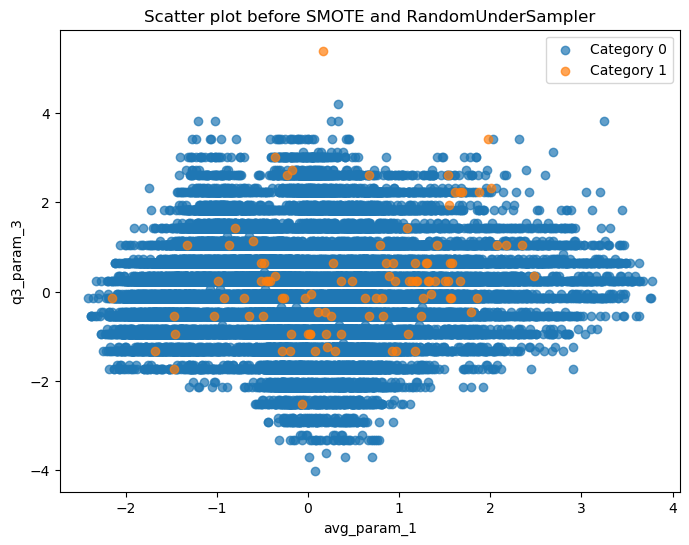

In [23]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_data[train_data['OUTPUT'] == 0]['avg_param_1'],
            train_data[train_data['OUTPUT'] == 0]['q3_param_3'],
            label='Category 0', alpha=0.7)

plt.scatter(train_data[train_data['OUTPUT'] == 1]['avg_param_1'],
            train_data[train_data['OUTPUT'] == 1]['q3_param_3'],
            label='Category 1', alpha=0.7)

plt.title('Scatter plot before SMOTE and RandomUnderSampler')
plt.xlabel('avg_param_1')
plt.ylabel('q3_param_3')
plt.legend()
plt.show()


In [24]:
# Define SMOTE and RandomUnderSampler
over = SMOTE(sampling_strategy=0.05, k_neighbors=6)
under = RandomUnderSampler(sampling_strategy=1.0)

# Create a pipeline
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline on the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Create a DataFrame for easier visualization (replace this with your actual data)
train_data_resampled = pd.DataFrame(data=X_train_resampled, columns=quantitative_variables)
train_data_resampled['OUTPUT'] = y_train_resampled


D:\Programme\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "D:\Programme\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


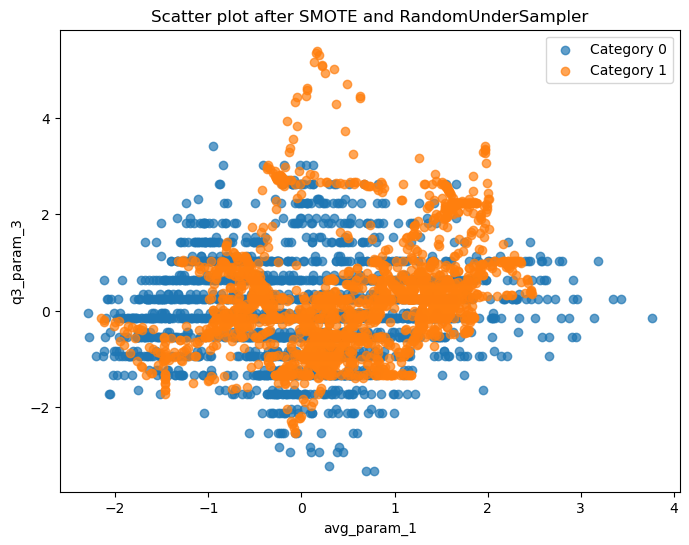

In [25]:
# Plot scatter points
plt.figure(figsize=(8, 6))
plt.scatter(train_data_resampled[train_data_resampled['OUTPUT'] == 0]['avg_param_1'],
            train_data_resampled[train_data_resampled['OUTPUT'] == 0]['q3_param_3'],
            label='Category 0', alpha=0.7)

plt.scatter(train_data_resampled[train_data_resampled['OUTPUT'] == 1]['avg_param_1'],
            train_data_resampled[train_data_resampled['OUTPUT'] == 1]['q3_param_3'],
            label='Category 1', alpha=0.7)

# Set plot title and labels
plt.title('Scatter plot after SMOTE and RandomUnderSampler')
plt.xlabel('avg_param_1')
plt.ylabel('q3_param_3')

# Show legend
plt.legend()

# Show the plot
plt.show()


## 5. **Machine Learning Model Development:**

In [39]:
# Initialize the RandomForestClassifier with 'entropy' as the criterion
model = RandomForestClassifier(criterion='entropy')

# Define the steps of the pipeline with SMOTE and RandomUnderSampler
over = SMOTE(sampling_strategy=0.05, k_neighbors=6)
under = RandomUnderSampler(sampling_strategy=1.0)
steps = [('over', over), ('under', under), ('model', model)]

# Create the pipeline
pipeline = Pipeline(steps=steps)

# Define the hyperparameter search grid for RandomForestClassifier
rf_params = {
    'model__max_features': ['sqrt', 'log2'],
    'model__n_estimators': [100, 150, 200, 250],
    'model__min_samples_leaf': [5, 10, 15, 20],
    'model__max_depth': [3, 5, 8, 10]
}

# Use GridSearchCV to find the best hyperparameters
clf = GridSearchCV(pipeline, param_grid=rf_params, cv=5, scoring='recall', n_jobs=-1)
clf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('over',
                                        SMOTE(k_neighbors=6,
                                              sampling_strategy=0.05)),
                                       ('under',
                                        RandomUnderSampler(sampling_strategy=1.0)),
                                       ('model',
                                        RandomForestClassifier(criterion='entropy'))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 8, 10],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [5, 10, 15, 20],
                         'model__n_estimators': [100, 150, 200, 250]},
             scoring='recall')

In [48]:
# Store the best score and parameters in a list
scores = [{
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
}]
scores


[{'best_score': 0.5663157894736842,
  'best_params': {'model__max_depth': 3,
   'model__max_features': 'log2',
   'model__min_samples_leaf': 15,
   'model__n_estimators': 100}}]

## 6. **Model Evaluation:**

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s


Accuracy: 0.8191450824126064
Precision: 0.00400600901352028
Recall: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90     11026
           1       0.00      0.50      0.01        16

    accuracy                           0.82     11042
   macro avg       0.50      0.66      0.45     11042
weighted avg       1.00      0.82      0.90     11042



[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
D:\Programme\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

D:\Programme\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning:

Mean of empty slice.

D:\Programme\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

D:\Programme\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

D:\Programme\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

D:\Programme\Lib\site-packages\sklea

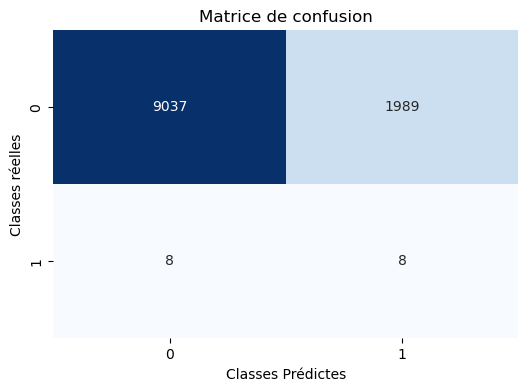

In [49]:
# Extract the best parameters
best_params = scores[0]['best_params']
n_estimators = best_params['model__n_estimators']
max_features = best_params['model__max_features']
min_samples_leaf = best_params['model__min_samples_leaf']
max_depth = best_params['model__max_depth']

# Initialize SMOTE, RandomUnderSampler, and RandomForestClassifier with the best parameters
over = SMOTE(sampling_strategy=0.05, k_neighbors=6)
under = RandomUnderSampler(sampling_strategy=1.0)
model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, min_samples_leaf=min_samples_leaf,
                               max_depth=max_depth, random_state=42, criterion='entropy', n_jobs=-1, verbose=1)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# Train the model on the full training set with the best value of k
smote_model = pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = smote_model.predict(X_test)

# Display evaluation metrics
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True)
ax.set_title("Matrice de confusion")
ax.set_xlabel('Classes Prédictes')
ax.set_ylabel('Classes réelles')



class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Compute prediction probabilities and create a DataFrame with true, predicted class, and probability
pred_proba = pipeline.predict_proba(X_test)
class_proba = [max(i) for i in pred_proba]
result_df = pd.DataFrame(data={'true': y_test, 'predicted_class': y_pred, "probability": class_proba})

# Recompute the validation metrics and the prediction rate with probability threshold filtered data
accuracy = []
recall = []
precision = []
f1 = []
pred_rate = []

for i in list(np.arange(0, 1, 0.01)):
    filtered_df = result_df[result_df["probability"] >= i]
    accuracy.append(accuracy_score(filtered_df["true"], filtered_df["predicted_class"]))
    recall.append(recall_score(filtered_df["true"], filtered_df["predicted_class"], pos_label=1))
    precision.append(precision_score(filtered_df["true"], filtered_df["predicted_class"], pos_label=1))
    f1.append(f1_score(filtered_df["true"], filtered_df["predicted_class"], pos_label=1))
    pred_rate.append(len(filtered_df) / len(result_df))

# Results in a dataframe
threshold_results = pd.DataFrame(data={
    "threshold": np.arange(0, 1, 0.01),
    "accuracy": accuracy,
    "recall": recall,
    "precision": precision,
    "f1-score": f1,
    "prediction_rate": pred_rate
})

# Plotting the metrics over threshold
import plotly.express as px

fig = px.line(threshold_results, x='threshold', y=['accuracy', 'recall', 'precision', 'f1-score', 'prediction_rate'],
              labels={'value': 'Metric Value', 'variable': 'Metric'},
              title='Evolution of Metrics with Threshold')

# Display the interactive figure
fig.show()


## 7. **Threshold Optimization and Analysis:**

The database contains: 2528 observations. This represents 23% of our original test sample.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2522
           1       0.03      0.83      0.06         6

    accuracy                           0.94      2528
   macro avg       0.52      0.89      0.51      2528
weighted avg       1.00      0.94      0.97      2528



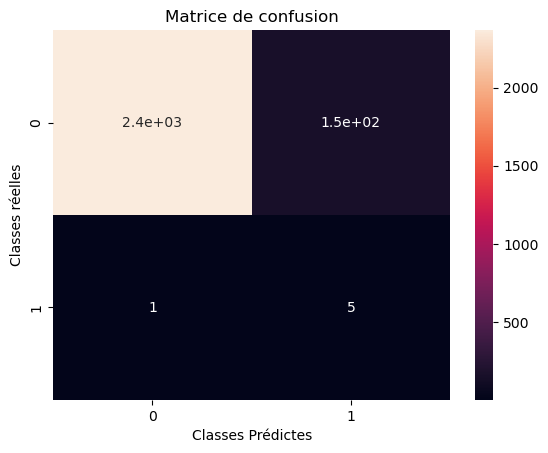

In [51]:
# Filter predictions with a probability >= 0.69
filtered_df = resultat[resultat["probability"] >= 0.69]

# Calculate the percentage of filtered observations
percentage = round((len(filtered_df) / len(resultat)) * 100)
print(f"The database contains: {len(filtered_df)} observations. This represents {percentage}% of our original test sample.")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(filtered_df["true"], filtered_df["predicted_class"])
ax = sns.heatmap(conf_matrix, annot=True)
ax.set_title("Matrice de confusion")
ax.set_xlabel('Classes Prédictes')
ax.set_ylabel('Classes réelles')


# Calculate the classification report
class_report = classification_report(filtered_df["true"], filtered_df["predicted_class"])

# Display the classification report
print("\nClassification Report:")
print(class_report)


The database contains: 1492 observations. This represents 14% of our original test sample.
Confusion Matrix:
[[1449   39]
 [   0    4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1488
           1       0.09      1.00      0.17         4

    accuracy                           0.97      1492
   macro avg       0.55      0.99      0.58      1492
weighted avg       1.00      0.97      0.98      1492

Matrice de Confusion:
[[1449   39]
 [   0    4]]

Rapport de Classification:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1488
           1       0.09      1.00      0.17         4

    accuracy                           0.97      1492
   macro avg       0.55      0.99      0.58      1492
weighted avg       1.00      0.97      0.98      1492



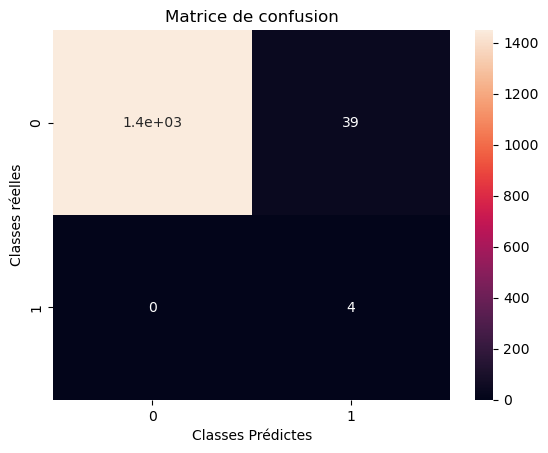

In [53]:

# Filter predictions with a probability >= 0.78
filtered_df = resultat[resultat["probability"] >= 0.81]

# Calculate the percentage of filtered observations
percentage = round((len(filtered_df) / len(resultat)) * 100)
print(f"The database contains: {len(filtered_df)} observations. This represents {percentage}% of our original test sample.")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(filtered_df["true"], filtered_df["predicted_class"])
ax = sns.heatmap(conf_matrix, annot=True)
ax.set_title("Matrice de confusion")
ax.set_xlabel('Classes Prédictes')
ax.set_ylabel('Classes réelles')
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report
class_report = classification_report(filtered_df["true"], filtered_df["predicted_class"])

# Display the classification report
print("\nClassification Report:")
print(class_report)

# Afficher la matrice de confusion
print("Matrice de Confusion:")
print(conf_matrix)

# Calculer le rapport de classification
class_report = classification_report(filtered_df["true"], filtered_df["predicted_class"])

# Afficher le rapport de classification
print("\nRapport de Classification:")
print(class_report)


## 8. **Feature Importance and Model Interpretation:**

In [ ]:
def feature_importance(model, top_n):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Extract feature importances and names
    feature_importance = model.feature_importances_
    feature_names = X_train.columns  

    # Create a dictionary to store feature importance
    feature_importance_dict = dict(zip(feature_names, feature_importance))

    # Sort features by importance in descending order
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Create a DataFrame for visualization
    data_features = pd.DataFrame(sorted_features, columns=['features', 'importances'])

    # Reverse the DataFrame for horizontal bar plotting
    data_features = data_features.iloc[::-1]

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(data_features['features'], data_features['importances'], color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Importance of the top {top_n} features')
    plt.show()


In [ ]:
# Applying SMOTE to generate synthetic samples for the minority class
over = SMOTE(sampling_strategy=0.05, k_neighbors=6)

# Randomly undersampling the majority class
under = RandomUnderSampler(sampling_strategy=1.0)

# Creating a RandomForestClassifier with specified hyperparameters
model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features,
                               min_samples_leaf=min_samples_leaf, max_depth=max_depth,
                               random_state=42, criterion='entropy', n_jobs=-1, verbose=1)

# Creating a pipeline with SMOTE, RandomUnderSampler, and RandomForestClassifier
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)


In [ ]:
# Accessing the RandomForestClassifier model step from the pipeline
rf_model = pipeline.named_steps['model']

# Calling the feature_importance function to visualize the top 20 important features
feature_importance(rf_model, 20)


In [ ]:
# Extracting the best hyperparameters from the grid search results
best_params = scores[0]['best_params']
n_estimators = best_params['model__n_estimators']
max_features = best_params['model__max_features']
min_samples_leaf = best_params['model__min_samples_leaf']
max_depth = best_params['model__max_depth']

# Setting up SMOTE and RandomUnderSampler with the best parameters
over = SMOTE(sampling_strategy=0.05, k_neighbors=6)
under = RandomUnderSampler(sampling_strategy=1.0)
model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, 
                               min_samples_leaf=min_samples_leaf, max_depth=max_depth, 
                               random_state=42, criterion='entropy', n_jobs=-1, verbose=1)

# Creating a pipeline with SMOTE, RandomUnderSampler, and RandomForestClassifier
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# Training the model on the full training set with the best hyperparameters
smote_model = pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = smote_model.predict(X_test)

# Displaying evaluation metrics
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Predicting probabilities and creating a DataFrame for further analysis
pred_proba = pipeline.predict_proba(X_test)
class_proba = [max(i) for i in pred_proba]
resultat = pd.DataFrame(data={'true': y_test, 'predicted_class': y_pred, "probability": class_proba})

# Filtering predictions with a probability >= 0.78
filtered_df_analyse = resultat[resultat["probability"] >= 0.78]


In [ ]:
# Merging the two dataframes based on the index
cluster_df = pd.merge(X_test, filtered_df_analyse, left_index=True, right_index=True, how='left')
cluster_df.head()


In [ ]:
# Display the shape of the resulting dataframe
cluster_df.shape


In [ ]:
# Select True positive i.e the row where the true label is 1 and the predicted class is 1 (True Positives)
vp_data = cluster_df[(cluster_df['true'] == 1) & (cluster_df['predicted_class'] == 1)]

# Select False Positive i.e rows where the true label is 0 and the predicted class is 1 (False Positives)
fp_data = cluster_df[(cluster_df['true'] == 0) & (cluster_df['predicted_class'] == 1)]


In [ ]:
# Compute summary statistics for True Positives (vp_data)
vp_sum = vp_data[['stddev_param_1', 'stddev_param_2']].describe()

# Rename the columns for clarity
vp_sum.rename(columns={"stddev_param_1": "vp_stddev_p1", "stddev_param_2": "vp_stddev_p2"}, inplace=True)


In [ ]:
# Compute summary statistics for False Positives (fp_data)
fp_sum = fp_data[['stddev_param_1', 'stddev_param_2']].describe()

# Rename the columns for clarity
fp_sum.rename(columns={"stddev_param_1": "fp_stddev_p1", "stddev_param_2": "fp_stddev_p2"}, inplace=True)


In [ ]:
# Concatenate summary statistics for True Positives (vp_sum) and False Positives (fp_sum)
cluster_desc = pd.concat([vp_sum, fp_sum], axis=1)

# Reset the index to make the 'stat' column a regular column
cluster_desc = cluster_desc.reset_index()

# Rename the 'index' column to 'stat'
cluster_desc.rename(columns={"index": "stat"}, inplace=True)

# Drop the first row (index 0) as it contains duplicate information
cluster_desc.drop(cluster_desc.index[0], inplace=True)

# Display the cluster_desc
cluster_desc

In [ ]:
# Plot a bar chart comparing True Positives (vp_stddev_p1) and False Positives (fp_stddev_p1)
cluster_desc.plot.bar(x='stat', y=['vp_stddev_p1', 'fp_stddev_p1'], color=['green', 'darkorange'])

# Set the title and axis labels
plt.title('Comparative Analysis of True Positives and False Positives for Parameter 1')
plt.xlabel('Different Statistics')
plt.ylabel('True Positives and False Positives')

# Show the plot
plt.show()


In [ ]:
# Plot a bar chart comparing True Positives (vp_stddev_p2) and False Positives (fp_stddev_p2)
cluster_desc.plot.bar(x='stat', y=['vp_stddev_p2', 'fp_stddev_p2'], color=['green', 'darkorange'])

# Set the title and axis labels
plt.title('Comparative Analysis of True Positives and False Positives for Parameter 2')
plt.xlabel('Different Statistics')
plt.ylabel('True Positives and False Positives')

# Show the plot
plt.show()



<hr>


| Date              | Auteur           |
| ----------------- | ---------------- | 
|                   | Leonor EXTREMET  |
| 10-03-2024        |                  |       
|                   | Miracle VODOUMBO |


<p>

